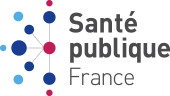

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column', 162)
pd.set_option('display.max_row', 162)

# Contexte
L'agence **Santé publique France** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.


# Objectif
* Trouver une idée d’application : sélection des variables pertinentes
* Traitement des données ( imputation, gestion des valeurs aberrantes / manquantes)
* Automatisant des traitements.
* Tests hypothèses et analyses exploratoires
* Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
* Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.


# Sommaire
**Données**
- Compréhension des données

In [2]:
df = pd.read_csv('openfoodfacts.csv', sep=',') 

In [3]:
df

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0,E
1,"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0,E
2,"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0,B
3,"!, Gummie Flower",0.00,47.50,1255.0,72.50,0.00,0.0,5.00,0.06350,13.0,D
4,"!, Halloween Mix Whole Wheat Cookies",30.00,25.00,2301.0,55.00,20.00,5.0,5.00,0.82550,19.0,E
...,...,...,...,...,...,...,...,...,...,...,...
112989,"Zweigle's, Hot Dog Sauce",0.00,20.00,418.0,26.67,0.00,0.0,0.00,2.54000,15.0,D
112990,Zwieback - Rusk,5.26,15.79,1540.0,78.95,2.63,5.3,10.53,0.73406,7.0,C
112991,Zwieback Snack Toast,5.00,10.00,1674.0,60.00,0.00,10.0,10.00,1.27000,6.0,C
112992,"Zymbom, Energy Drink With Taurine",0.00,10.80,184.0,11.20,0.00,0.0,0.40,0.20320,2.0,B


# Les  données
## Compréhension des données
Chargement des 4 fichiers csv avec la fonction read_csv de Pandas
<br> Utilisation des fonctions **head(),shape et describe()**

<img src='./oc_logo.png' width=15px /> Afficher les 5 premières lignes du dataframe `df`.

In [4]:
df.head(3)

,product_name,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,nutrition_grade_fr
0,"!, Chocolate Bear Crunch Popcorn",25.00,52.50,1987.0,62.50,11.25,2.5,5.00,0.79248,25.0,E
1,"!, Chocolate Gems",21.43,61.90,1891.0,66.67,14.29,0.0,4.76,0.12192,25.0,E
2,"!, Fresh Soda, Ginger",0.00,9.86,163.0,10.42,0.00,0.0,0.00,0.01016,2.0,B


In [5]:
df.describe()

,fat_100g,sugars_100g,energy_100g,carbohydrates_100g,saturated-fat_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000,112994.000000
mean,12.029515,17.107087,1144.296463,35.336524,4.241426,2.427976,6.851555,1.768504,9.455339
std,16.118110,21.949690,771.327282,29.684162,7.002032,4.291831,8.132915,6.499003,8.723027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,0.000000,1.180000,412.854167,7.140000,0.000000,0.000000,0.000000,0.068580,1.000000
50%,5.000000,6.670000,1197.000000,27.270000,0.755000,0.700000,4.350000,0.635000,10.000000
75%,20.000000,26.670000,1674.000000,62.134375,6.250000,3.300000,10.000000,1.470660,16.000000
max,100.000000,100.000000,3766.000000,100.000000,100.000000,100.000000,100.000000,99.905820,37.000000


In [6]:
df.columns

Index(['product_name', 'fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112994 entries, 0 to 112993
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             112994 non-null  object 
 1   fat_100g                 112994 non-null  float64
 2   sugars_100g              112994 non-null  float64
 3   energy_100g              112994 non-null  float64
 4   carbohydrates_100g       112994 non-null  float64
 5   saturated-fat_100g       112994 non-null  float64
 6   fiber_100g               112994 non-null  float64
 7   proteins_100g            112994 non-null  float64
 8   salt_100g                112994 non-null  float64
 9   nutrition-score-fr_100g  112994 non-null  float64
 10  nutrition_grade_fr       112994 non-null  object 
dtypes: float64(9), object(2)
memory usage: 9.5+ MB


### Analyse Univariée


In [8]:
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Tests de normalité

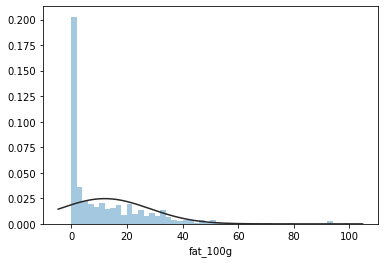

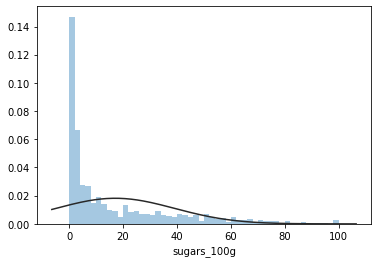

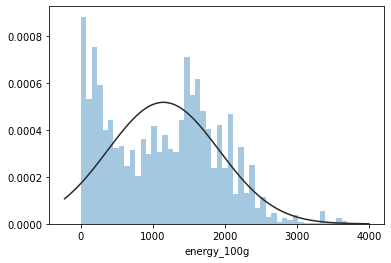

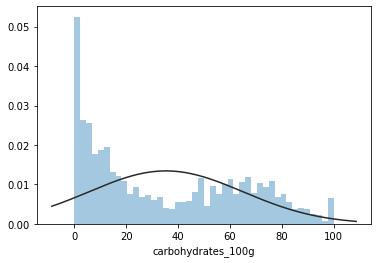

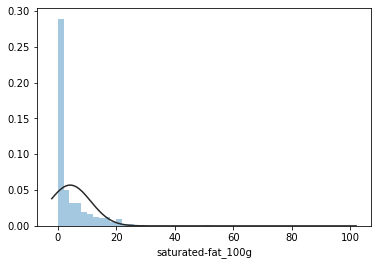

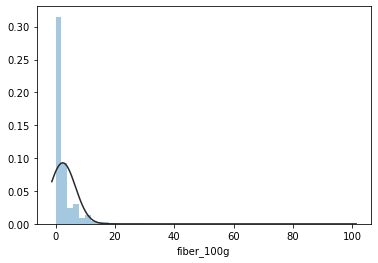

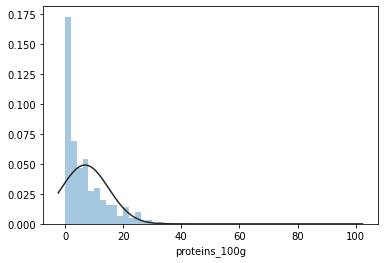

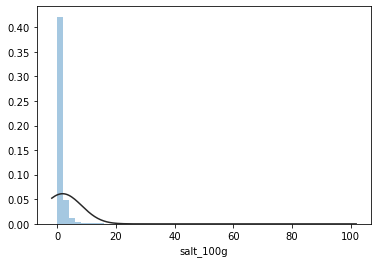

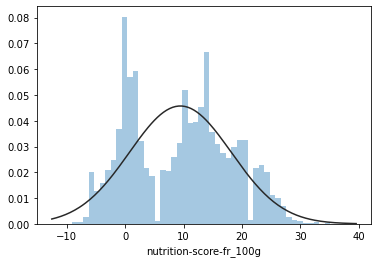

In [9]:
#distplot
for col in df.select_dtypes('number'):
    sns.distplot(df[col], fit=norm, kde=False)
    plt.show()

In [10]:
# test de normalité Shapiro-Wilk
seuil = 0.05

for col in df.select_dtypes('number'):
    w, pvalue = st.shapiro(df[col])
    print(f'{col :-<70} {w} {pvalue}')
    if pvalue > seuil:
        print("On ne peux pas rejetter H0: la distribution suit une loi normale")
    else:
        print("On rejette H0 : la distribution ne suit pas une loi normale")

NameError: name 'st' is not defined

In [ ]:
#qqpolot vs. loi normale (droite de Henry)
for col in df.select_dtypes('number'):
    sm.qqplot(df[col],stats.t, fit=True, line="45")
    plt.title("Q-Q norm droite de Henry")
    print(col)
    plt.show()

In [ ]:
for col in df.select_dtypes('number'):
    plt.figure(figsize=(15,6))
    sns.boxplot(df[col])
    plt.xticks(rotation=90)
    plt.show()

### Analyse Bivariée

In [ ]:
# Compute the correlation matrix
corr = df[['fat_100g', 'sugars_100g', 'energy_100g',
       'carbohydrates_100g', 'saturated-fat_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'nutrition_grade_fr']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
sns.pairplot(df)

#### Nutrition grade _ fat_100g

In [ ]:
sns.displot(data=df, x="fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ sugars_100g

In [ ]:
sns.displot(data=df, x="sugars_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="sugars_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation sugars_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ energy_100g

In [ ]:
sns.displot(data=df, x="energy_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="energy_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation energy_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ carbohydrates_100g

In [ ]:
sns.displot(data=df, x="carbohydrates_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="carbohydrates_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation carbohydrates_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ saturated-fat_100g

In [ ]:
sns.displot(data=df, x="saturated-fat_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="saturated-fat_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation saturated-fat_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ fiber_100g 

In [ ]:
sns.displot(data=df, x="fiber_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="fiber_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation fiber_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ proteins_100g   

In [ ]:
sns.displot(data=df, x="proteins_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="proteins_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation proteins_100g en fonction du nutrition grade")
plt.show()

#### Nutrition grade _ salt_100g 

In [ ]:
sns.displot(data=df, x="salt_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="salt_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation salt_100g en fonction du nutrition grade ")
plt.show()

#### Nutrition grade _ nutrition-score-fr_100g

In [ ]:
sns.displot(data=df, x="nutrition-score-fr_100g", hue="nutrition_grade_fr", kind="kde", log_scale=None)

In [ ]:
#Visualisation boxplot
fig = plt.figure(figsize=[16, 8])
sns.set(font_scale=2)
sns.boxplot(x="nutrition_grade_fr", y="nutrition-score-fr_100g", data=df, showmeans=True,color='white')
plt.title("Visualisation nutrition-score en fonction du nutrition grade ")
plt.show()

## Tests d'hypothèses 

Nous utiliserons la statistique inférentielle pour interpreter nos données afin d'aquérir une meilleure connaissance

Les tests parametriques :

ANOVA : Comparaison de plusieurs moyennes

Test parametrique ANOVA (puissant pour savoir si nous pouvons oui ou non rejeter H0)

In [ ]:
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df.columns

#### Les variables fat_100g d'un produit et le nutriscore

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables fat_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables fat_100g d'un produit et le nutriscore obtenu sont corrélées

In [ ]:
linear_model = ols('fat_100g ~ C(nutrition_grade_fr)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

#### Les variables sugars_100g d'un produit et le nutriscore

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables sugars_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables sugars_100g d'un produit et le nutriscore obtenu sont corrélées

In [ ]:
linear_model = ols('sugars_100g ~ C(nutrition_grade_fr)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

#### Les variables energy_100g d'un produit et le nutriscore

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables energy_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables energy_100g d'un produit et le nutriscore obtenu sont corrélées

In [ ]:
linear_model = ols('energy_100g ~ C(nutrition_grade_fr)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

#### Les variables carbohydrates_100g d'un produit et le nutriscore

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables carbohydrates_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables carbohydrates_100g d'un produit et le nutriscore obtenu sont corrélées

In [ ]:
linear_model = ols('carbohydrates_100g ~ C(nutrition_grade_fr)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

#### Les variables fiber_100g d'un produit et le nutriscore

In [ ]:
# Hypothèses
# H0: l'hypothèse nulle: Les variables fiber_100g d'un produit et le nutriscore obtenu sont indépendantes
# Ha: l'hypothèse alternative: Les variables fiber_100g d'un produit et le nutriscore obtenu sont corrélées

In [ ]:
linear_model = ols('fiber_100g ~ C(nutrition_grade_fr)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

In [ ]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

In [ ]:
seuil = 0.05
# Conclusion
if pvalue > seuil:
    print("On ne peux pas rejetter H0: il n'y a pas de corrélation")
else:
    print("On rejette H0 : il y a une corrélation")

In [ ]:
#df.set_index('product_name',inplace=True)

In [ ]:
df

### Analyse en Composantes Principales 

 l'ACP est une méthode statistique qui permet de représenter les données sur un graphique facilement interprétables.

In [ ]:
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from pyensae.graphhelper import Corrplot

In [ ]:
Z = df.select_dtypes('float')

In [ ]:
c = Corrplot(Z)
c.plot(figsize=(15,8))
plt.show()

In [ ]:
scaler = StandardScaler()

df_acp=df.select_dtypes('float')
df_acp=pd.DataFrame(scaler.fit_transform(df_acp), columns=df_acp.columns)
df_acp.head()

In [ ]:
pca = PCA(n_components=6)
Principal_components=pca.fit_transform(df_acp)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
print(pca_df)

In [ ]:
for_visual = pd.concat([pca_df, df['nutrition_grade_fr']], axis = 1)
print(for_visual)

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot PC1 PC2 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['navy', 'turquoise', 'darkorange', '#d2615c', '#77cc58']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 3', fontsize = 15)
ax.set_ylabel('PC 4', fontsize = 15)
ax.set_title('Plot PC3 PC4 vs. Nutrition grade', fontsize = 20)
nutrition_grade = ['A','B','C','D','E']
colors = ['navy', 'turquoise', 'darkorange', '#d2615c', '#77cc58']
for nutrition_grade_fr, color in zip(nutrition_grade,colors):
    indicesToKeep = for_visual['nutrition_grade_fr'] == nutrition_grade_fr
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 3']
               , for_visual.loc[indicesToKeep, 'PC 4']
               , c = color
               , s = 50)
ax.legend(nutrition_grade)
ax.grid()

### Diagramme éboulis des valeurs propres
Les pourcentages d’inertie nous donnent une information sur la « structure » de nos données.

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Les 4 premières composantes expliquent 83% de la variance totale des données. On peut donc dire que la dimension intrasèques de cet ensemble de données est raisonnablement égale à 4. Transformons donc la dataframe originelle en une dataframe de 4 variables

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(pca_df)
principalDf = pd.DataFrame(data=principalComponents, columns=[
                           'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4'])

In [ ]:
principalDf

In [ ]:
finalDf = pd.concat([principalDf, df['nutrition_grade_fr']], axis=1)

In [ ]:
finalDf

In [ ]:
 def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7, 6))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('PC{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('PC{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (PC{} et PC{})".format(d1+1, d2+1))
            plt.show(block=False)

In [ ]:
features = df_acp.columns

In [ ]:
n_comp = 4
pcs = pca.components_
fig = plt.figure(figsize=(16, 16))
display_circles(pcs, n_comp, pca, [
                (0, 1), (2, 3), (4, 5)], labels=np.array(features))

In [ ]:
df_acp

## Réaliser un clustering hiérarchique

In [ ]:

metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(df_acp.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap,
                             row_cluster=True, col_cluster=True,
                             center=0.0, vmin=-4.8, vmax=4.8)